## Twitter analysis using N-grams

In [2]:
## Import libraries
import pandas as pd
import ast
import string
from cleantext import clean
import re

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [3]:
##read the csv file
df = pd.read_csv('F1.csv', index_col = 0)

In [4]:
df.head()

,Created at,Text
0,2022-05-05 21:05:00,The grid has certainly enjoyed Miami so far! 🌴...
1,2022-05-05 20:45:00,"""I know you struggle with maths"" 😆\n\n@LandoNo..."
2,2022-05-05 20:04:00,Your first glimpse of some action around Miami...
3,2022-05-05 19:58:24,RT @yukitsunoda07: https://t.co/qk1dNNQRjE
4,2022-05-05 19:30:00,Checking out the all-new Miami track! 🤩\n\n#Mi...


In [6]:
## Remove hyperlinks
remove_hyperlinks=[]
for text in df['Text']:
    x=re.sub('http://\S+|https://\S+', '', text)
    remove_hyperlinks.append(x)

In [7]:
remove_hyperlinks

['The grid has certainly enjoyed Miami so far! 🌴\n\nTake a look at what they have been getting up to 🤩\n\n#MiamiGP #F1\n\n',
 '"I know you struggle with maths" 😆\n\n@LandoNorris and @GeorgeRussell63 enjoyed some backstage banter before the Miam… ',
 'Your first glimpse of some action around Miami 👀\n\nThe Safety Car hits the track for its first outing! 🤩\n\n#MiamiGP… ',
 'RT @yukitsunoda07: ',
 'Checking out the all-new Miami track! 🤩\n\n#MiamiGP #F1 ',
 'George is loving the Miami vibe 😎\n\nWe sent our cameras backstage at the Miami Opening Party to chat with the driver… ',
 "Training with @InterMiamiCF \nBallin' with the @Marlins \nCourtside at @MiamiHEAT \n\nNo matter the sport, the Miami vi… ",
 "Here's to another two years 😍\n\nFormula 1: Drive To Survive is renewed for Season 5 and 6!\n\n#F1 @netflix ",
 'Who will be in the mix for victory? 👀\n\nGet ready for a special weekend in Miami with our form guide 📊\n\n#MiamiGP #F1\n\n',
 'RT @LandoNorris: Slam dunk 🏀 ',
 "🏈 Touchdown or 

In [5]:
string_clean = ' '.join(remove_hyperlinks)
string_clean

'The grid has certainly enjoyed Miami so far! 🌴\n\nTake a look at what they have been getting up to 🤩\n\n#MiamiGP #F1\n\n "I know you struggle with maths" 😆\n\n@LandoNorris and @GeorgeRussell63 enjoyed some backstage banter before the Miam…  Your first glimpse of some action around Miami 👀\n\nThe Safety Car hits the track for its first outing! 🤩\n\n#MiamiGP…  RT @yukitsunoda07:  Checking out the all-new Miami track! 🤩\n\n#MiamiGP #F1  George is loving the Miami vibe 😎\n\nWe sent our cameras backstage at the Miami Opening Party to chat with the driver…  Training with @InterMiamiCF \nBallin\' with the @Marlins \nCourtside at @MiamiHEAT \n\nNo matter the sport, the Miami vi…  Here\'s to another two years 😍\n\nFormula 1: Drive To Survive is renewed for Season 5 and 6!\n\n#F1 @netflix  Who will be in the mix for victory? 👀\n\nGet ready for a special weekend in Miami with our form guide 📊\n\n#MiamiGP #F1\n\n RT @LandoNorris: Slam dunk 🏀  🏈 Touchdown or three-pointer? 🏀\n\nWe asked our driver

In [6]:
## remove new line and tabs
string_clean = string_clean.replace('\n'," ")
string_clean = string_clean.replace('\t'," ")

In [7]:
new_string = string_clean.translate(str.maketrans('', '', string.punctuation))

In [8]:
new_string

'The grid has certainly enjoyed Miami so far 🌴  Take a look at what they have been getting up to 🤩  MiamiGP F1   I know you struggle with maths 😆  LandoNorris and GeorgeRussell63 enjoyed some backstage banter before the Miam…  Your first glimpse of some action around Miami 👀  The Safety Car hits the track for its first outing 🤩  MiamiGP…  RT yukitsunoda07  Checking out the allnew Miami track 🤩  MiamiGP F1  George is loving the Miami vibe 😎  We sent our cameras backstage at the Miami Opening Party to chat with the driver…  Training with InterMiamiCF  Ballin with the Marlins  Courtside at MiamiHEAT   No matter the sport the Miami vi…  Heres to another two years 😍  Formula 1 Drive To Survive is renewed for Season 5 and 6  F1 netflix  Who will be in the mix for victory 👀  Get ready for a special weekend in Miami with our form guide 📊  MiamiGP F1   RT LandoNorris Slam dunk 🏀  🏈 Touchdown or threepointer 🏀  We asked our drivers which American sport theyd love to see upclose and personal…  RT

In [9]:
## installing contractions library
!pip install contractions -q

In [10]:
import contractions

In [11]:
# Converting contractions to full words
expanded_words = []   
for word in new_string.split():
    expanded_words.append(contractions.fix(word))  

expanded_text = ' '.join(expanded_words)

In [12]:
expanded_text

'The grid has certainly enjoyed Miami so far 🌴 Take a look at what they have been getting up to 🤩 MiamiGP F1 I know you struggle with maths 😆 LandoNorris and GeorgeRussell63 enjoyed some backstage banter before the Miam… Your first glimpse of some action around Miami 👀 The Safety Car hits the track for its first outing 🤩 MiamiGP… RT yukitsunoda07 Checking out the allnew Miami track 🤩 MiamiGP F1 George is loving the Miami vibe 😎 We sent our cameras backstage at the Miami Opening Party to chat with the driver… Training with InterMiamiCF Ballin with the Marlins Courtside at MiamiHEAT No matter the sport the Miami vi… Here Is to another two years 😍 Formula 1 Drive To Survive is renewed for Season 5 and 6 F1 netflix Who will be in the mix for victory 👀 Get ready for a special weekend in Miami with our form guide 📊 MiamiGP F1 RT LandoNorris Slam dunk 🏀 🏈 Touchdown or threepointer 🏀 We asked our drivers which American sport they would love to see upclose and personal… RT ZhouGuanyu24 🏖️🏀🕶 Wha

In [13]:

!pip install git+https://github.com/LIAAD/yake

  Cloning https://github.com/LIAAD/yake to c:\users\bhagy\appdata\local\temp\pip-req-build-gcu6ghif
  Resolved https://github.com/LIAAD/yake to commit 238ae58c5ba39326a96862ee0e9cb817e5958440
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake 'C:\Users\bhagy\AppData\Local\Temp\pip-req-build-gcu6ghif'


In [14]:
list_expanded_text=expanded_text.split(',')

In [15]:
##Remove emojis
list_no_emojis=[]
for text in list_expanded_text:
    no_emoji=clean(text, no_emoji=True)
    list_no_emojis.append(no_emoji)

In [16]:
list_no_emojis

['the grid has certainly enjoyed miami so far take a look at what they have been getting up to miamigp f1 i know you struggle with maths landonorris and georgerussell63 enjoyed some backstage banter before the miam your first glimpse of some action around miami the safety car hits the track for its first outing miamigp rt yukitsunoda07 checking out the allnew miami track miamigp f1 george is loving the miami vibe we sent our cameras backstage at the miami opening party to chat with the driver training with intermiamicf ballin with the marlins courtside at miamiheat no matter the sport the miami vi here is to another two years formula 1 drive to survive is renewed for season 5 and 6 f1 netflix who will be in the mix for victory get ready for a special weekend in miami with our form guide miamigp f1 rt landonorris slam dunk touchdown or threepointer we asked our drivers which american sport they would love to see upclose and personal rt zhouguanyu24 whasssup miami welcome to miami here i

In [17]:
final_string=','.join(list_no_emojis)

In [18]:
import sys
import pandas as pd
import nltk, re, string, collections
import spacy
from wordcloud import WordCloud
from nltk.util import ngrams # function for making ngrams

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhagy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhagy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
##Removing stopwords and lemmatizing
removed_stop_words=[]
from nltk.stem import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
text_tokens = word_tokenize(final_string)
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
preprocessed_text = ' '.join([lmtzr.lemmatize(word) for word in tokens_without_sw])
removed_stop_words.append(preprocessed_text)
print(removed_stop_words)

["grid certainly enjoyed miami far look getting miamigp f1 know struggle math landonorris georgerussell63 enjoyed backstage banter miam first glimpse action around miami safety car hit track first outing miamigp rt yukitsunoda07 checking allnew miami track miamigp f1 george loving miami vibe sent camera backstage miami opening party chat driver training intermiamicf ballin marlin courtside miamiheat matter sport miami another two year formula 1 drive survive renewed season 5 6 f1 netflix mix victory get ready special weekend miami form guide miamigp f1 rt landonorris slam dunk touchdown threepointer asked driver american sport would love see upclose personal rt zhouguanyu24 whasssup miami welcome miami guide weekend action sunshine state miamigp f1 f1miami ready rock miami international autodrome jump aboard f1 22 cover star f1 ambassador energy noise excitement thank welcome like f1miami miamigp f1 miami thank incredible welcome x f1miami miamigp f1 hey mum tv change danielricciardo m

In [20]:
stopset = set(nltk.corpus.stopwords.words('english'))

In [71]:
###Adding extra stopwords 
extra_stop_words=['f1','rt','22','14']

In [72]:
##Adding extra stopwords to the stopword set
new_stopwords_list = stopset.union(extra_stop_words)

In [73]:
final_string

"grid certainly enjoyed miami far look getting miamigp f1 know struggle math landonorris georgerussell63 enjoyed backstage banter miam first glimpse action around miami safety car hit track first outing miamigp rt yukitsunoda07 checking allnew miami track miamigp f1 george loving miami vibe sent camera backstage miami opening party chat driver training intermiamicf ballin marlin courtside miamiheat matter sport miami another two year formula 1 drive survive renewed season 5 6 f1 netflix mix victory get ready special weekend miami form guide miamigp f1 rt landonorris slam dunk touchdown threepointer asked driver american sport would love see upclose personal rt zhouguanyu24 whasssup miami welcome miami guide weekend action sunshine state miamigp f1 f1miami ready rock miami international autodrome jump aboard f1 22 cover star f1 ambassador energy noise excitement thank welcome like f1miami miamigp f1 miami thank incredible welcome x f1miami miamigp f1 hey mum tv change danielricciardo mi

In [74]:
##Removing stopwords and lemmatizing
from nltk.stem import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
text_tokens = word_tokenize(final_string)
#tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
tokens_without_sw = [word for word in text_tokens if not word in new_stopwords_list]
preprocessed_text = ' '.join([lmtzr.lemmatize(word) for word in tokens_without_sw])
removed_stop_words.append(preprocessed_text)
print(removed_stop_words)

["grid certainly enjoyed miami far look getting miamigp f1 know struggle math landonorris georgerussell63 enjoyed backstage banter miam first glimpse action around miami safety car hit track first outing miamigp rt yukitsunoda07 checking allnew miami track miamigp f1 george loving miami vibe sent camera backstage miami opening party chat driver training intermiamicf ballin marlin courtside miamiheat matter sport miami another two year formula 1 drive survive renewed season 5 6 f1 netflix mix victory get ready special weekend miami form guide miamigp f1 rt landonorris slam dunk touchdown threepointer asked driver american sport would love see upclose personal rt zhouguanyu24 whasssup miami welcome miami guide weekend action sunshine state miamigp f1 f1miami ready rock miami international autodrome jump aboard f1 22 cover star f1 ambassador energy noise excitement thank welcome like f1miami miamigp f1 miami thank incredible welcome x f1miami miamigp f1 hey mum tv change danielricciardo m

In [75]:
##Converting list to string
final_string=','.join(removed_stop_words)

In [76]:
##Tokenizing and generating bigrams and its frequenxcy value using ngrams
tokenized = final_string.split()
esBigrams = ngrams(tokenized, 2)
esBigramFreq = collections.Counter(esBigrams)
esBigramFreq.most_common(20)

[(('miamigp', 'f1'), 29),
 (('miamigp', 'f1miami'), 18),
 (('miami', 'international'), 16),
 (('international', 'autodrome'), 16),
 (('f1miami', 'miamigp'), 16),
 (('race', 'week'), 16),
 (('opening', 'party'), 12),
 (('welcome', 'miami'), 12),
 (('landonorris', 'georgerussell63'), 8),
 (('allnew', 'miami'), 8),
 (('miami', 'vibe'), 8),
 (('miami', 'welcome'), 8),
 (('f1miami', 'miami'), 8),
 (('pumped', 'miamigp'), 8),
 (('love', 'american'), 8),
 (('grand', 'prix'), 8),
 (('world', 'title'), 8),
 (('tom', 'brady'), 8),
 (('miami', 'ready'), 8),
 (('autodrome', 'miamigp'), 8)]

In [77]:
##Most common 20 bigrams
bigram_list=list(esBigramFreq.most_common(20))

In [78]:
##Bigram list
bigram_list

[(('miamigp', 'f1'), 29),
 (('miamigp', 'f1miami'), 18),
 (('miami', 'international'), 16),
 (('international', 'autodrome'), 16),
 (('f1miami', 'miamigp'), 16),
 (('race', 'week'), 16),
 (('opening', 'party'), 12),
 (('welcome', 'miami'), 12),
 (('landonorris', 'georgerussell63'), 8),
 (('allnew', 'miami'), 8),
 (('miami', 'vibe'), 8),
 (('miami', 'welcome'), 8),
 (('f1miami', 'miami'), 8),
 (('pumped', 'miamigp'), 8),
 (('love', 'american'), 8),
 (('grand', 'prix'), 8),
 (('world', 'title'), 8),
 (('tom', 'brady'), 8),
 (('miami', 'ready'), 8),
 (('autodrome', 'miamigp'), 8)]

In [114]:
dict_ngram={}
for i in bigram_list:
    name1=i[0][0]
    name2=i[0][1]
    freq=i[1]
    name=name1+' '+name2
    dict_ngram[name]=freq

In [115]:
dict_ngram

{'miamigp f1': 29,
 'miamigp f1miami': 18,
 'miami international': 16,
 'international autodrome': 16,
 'f1miami miamigp': 16,
 'race week': 16,
 'opening party': 12,
 'welcome miami': 12,
 'landonorris georgerussell63': 8,
 'allnew miami': 8,
 'miami vibe': 8,
 'miami welcome': 8,
 'f1miami miami': 8,
 'pumped miamigp': 8,
 'love american': 8,
 'grand prix': 8,
 'world title': 8,
 'tom brady': 8,
 'miami ready': 8,
 'autodrome miamigp': 8}

In [128]:
df_dict_ngram.drop(columns='level_0', inplace=True)

In [124]:
#3Reseting index
df_dict_ngram.reset_index(inplace=True)


In [129]:
df_dict_ngram

,index,0
0,miamigp f1,29
1,miamigp f1miami,18
2,miami international,16
3,international autodrome,16
4,f1miami miamigp,16
5,race week,16
6,opening party,12
7,welcome miami,12
8,landonorris georgerussell63,8
9,allnew miami,8


In [140]:
##Renaming the columns
df_dict_ngram.rename(columns={"index": "Phrases", 0:"Freq"})

,Names,freq
0,miamigp f1,29
1,miamigp f1miami,18
2,miami international,16
3,international autodrome,16
4,f1miami miamigp,16
5,race week,16
6,opening party,12
7,welcome miami,12
8,landonorris georgerussell63,8
9,allnew miami,8


In [141]:
df_dict_ngram

,Names,freq
0,miamigp f1,29
1,miamigp f1miami,18
2,miami international,16
3,international autodrome,16
4,f1miami miamigp,16
5,race week,16
6,opening party,12
7,welcome miami,12
8,landonorris georgerussell63,8
9,allnew miami,8


Text(0.5, 1.0, 'Twitter Bigrams')

<Figure size 1008x1152 with 0 Axes>

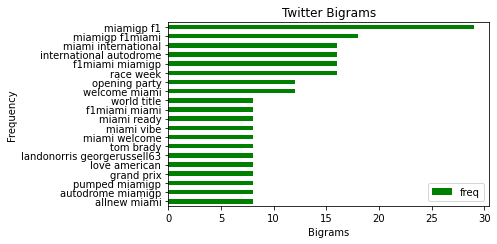

In [176]:
##Plotting Bigrams using bar graph
plt.figure(figsize=(14,16))
df_dict_ngram.sort_values('freq',inplace=True)
df_dict_ngram.plot(kind='barh',y='freq',x='Names',color='g')
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Twitter Bigrams")

In [148]:
##Trigrams using collections and ngrams model
esBigrams = ngrams(tokenized, 3)
esBigramFreq = collections.Counter(esBigrams)
esBigramFreq.most_common(25)
trigram_list=esBigramFreq.most_common(25)

In [149]:
## Trigram list
trigram_list

[(('miami', 'international', 'autodrome'), 16),
 (('international', 'autodrome', 'miamigp'), 8),
 (('welcome', 'race', 'week'), 8),
 (('miamigp', 'f1', 'f1miami'), 6),
 (('miamigp', 'f1miami', 'miami'), 6),
 (('certainly', 'enjoyed', 'miami'), 4),
 (('enjoyed', 'miami', 'far'), 4),
 (('look', 'getting', 'miamigp'), 4),
 (('know', 'struggle', 'math'), 4),
 (('struggle', 'math', 'landonorris'), 4),
 (('math', 'landonorris', 'georgerussell63'), 4),
 (('landonorris', 'georgerussell63', 'enjoyed'), 4),
 (('georgerussell63', 'enjoyed', 'backstage'), 4),
 (('enjoyed', 'backstage', 'banter'), 4),
 (('backstage', 'banter', 'miam'), 4),
 (('banter', 'miam', 'first'), 4),
 (('miam', 'first', 'glimpse'), 4),
 (('first', 'glimpse', 'action'), 4),
 (('glimpse', 'action', 'around'), 4),
 (('action', 'around', 'miami'), 4),
 (('around', 'miami', 'safety'), 4),
 (('miami', 'safety', 'car'), 4),
 (('safety', 'car', 'hit'), 4),
 (('car', 'hit', 'track'), 4),
 (('hit', 'track', 'first'), 4)]

In [152]:
##Creating dictionary
dict_ngram={}
for i in trigram_list:
    name1=i[0][0]
    name2=i[0][1]
    name3=i[0][2]
    freq=i[1]
    name=name1+' '+name2+' '+name3
    dict_ngram[name]=freq

In [153]:
##Printing the trigrams with their frequency value
dict_ngram

{'miami international autodrome': 16,
 'international autodrome miamigp': 8,
 'welcome race week': 8,
 'miamigp f1 f1miami': 6,
 'miamigp f1miami miami': 6,
 'certainly enjoyed miami': 4,
 'enjoyed miami far': 4,
 'look getting miamigp': 4,
 'know struggle math': 4,
 'struggle math landonorris': 4,
 'math landonorris georgerussell63': 4,
 'landonorris georgerussell63 enjoyed': 4,
 'georgerussell63 enjoyed backstage': 4,
 'enjoyed backstage banter': 4,
 'backstage banter miam': 4,
 'banter miam first': 4,
 'miam first glimpse': 4,
 'first glimpse action': 4,
 'glimpse action around': 4,
 'action around miami': 4,
 'around miami safety': 4,
 'miami safety car': 4,
 'safety car hit': 4,
 'car hit track': 4,
 'hit track first': 4}

In [157]:
## convert dataframe
df_trigram=pd.DataFrame.from_dict(dict_ngram,orient='index')

In [158]:
df_trigram

,0
miami international autodrome,16
international autodrome miamigp,8
welcome race week,8
miamigp f1 f1miami,6
miamigp f1miami miami,6
certainly enjoyed miami,4
enjoyed miami far,4
look getting miamigp,4
know struggle math,4
struggle math landonorris,4


In [159]:
##Reset the index value
df_trigram.reset_index(inplace=True)

In [160]:
df_trigram

,index,0
0,miami international autodrome,16
1,international autodrome miamigp,8
2,welcome race week,8
3,miamigp f1 f1miami,6
4,miamigp f1miami miami,6
5,certainly enjoyed miami,4
6,enjoyed miami far,4
7,look getting miamigp,4
8,know struggle math,4
9,struggle math landonorris,4


In [170]:
##Renaming columns of the dataframe
df_trigram.rename(columns={"index": "Phrases", 0:"Freq"},inplace=True)

In [171]:
df_trigram.columns

Index(['Phrases', 'Freq'], dtype='object')

Text(0.5, 1.0, 'Twitter Trigrams')

<Figure size 1008x1152 with 0 Axes>

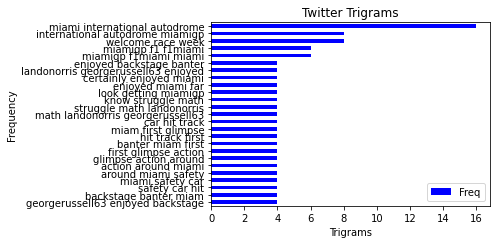

In [178]:
##Plotting trigrams using bar graph
plt.figure(figsize=(14,16))
df_trigram.sort_values('Freq',inplace=True)
df_trigram.plot(kind='barh',y='Freq',x='Phrases',color='b')
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.title("Twitter Trigrams")

## YAKE

In [81]:
##Installing yake model
pip install git+https://github.com/LIAAD/yake

  Cloning https://github.com/LIAAD/yake to c:\users\bhagy\appdata\local\temp\pip-req-build-xlovalrv
  Resolved https://github.com/LIAAD/yake to commit 238ae58c5ba39326a96862ee0e9cb817e5958440
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake 'C:\Users\bhagy\AppData\Local\Temp\pip-req-build-xlovalrv'


In [82]:
##Importing libraries for yake model
import yake
import pandas as pd
import re
from cleantext import clean

In [83]:
##Passing the values through yake model
import yake
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(final_string)
keywords_sort=sorted(keywords,key=lambda x: x[1],reverse=True)

In [31]:
type(keywords)

list

In [84]:
keywords_sort

[('weekend miamigp driver', 1.7652876687240923e-05),
 ('ready rock miami', 1.752315582783526e-05),
 ('week miami excited', 1.723647037674567e-05),
 ('guy miamigp week', 1.7204419975468976e-05),
 ('miami guide weekend', 1.6719835583570523e-05),
 ('allnew miami international', 1.6441886260511323e-05),
 ('heat miami ready', 1.5608305630228093e-05),
 ('hitting miami race', 1.5489848764569187e-05),
 ('miami opening party', 1.5198383041207984e-05),
 ('special weekend miami', 1.4966025041833326e-05),
 ('ahead miami weekend', 1.4966025041833326e-05),
 ('race week miamigp', 1.0662738035226531e-05),
 ('miami beauty miamigp', 9.686626898299729e-06),
 ('miami race week', 9.353921173593649e-06),
 ('race week miami', 9.353921173593647e-06),
 ('miami track miamigp', 8.482665461244785e-06),
 ('miami guy miamigp', 8.482665461244785e-06),
 ('international autodrome miamigp', 7.3537679434664755e-06),
 ('miami weekend miamigp', 6.395007378855243e-06),
 ('miami international autodrome', 3.2254300489517883e

In [85]:
import matplotlib.pyplot as plt

In [86]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

('weekend miamigp driver', 1.7652876687240923e-05)
('ready rock miami', 1.752315582783526e-05)
('week miami excited', 1.723647037674567e-05)
('guy miamigp week', 1.7204419975468976e-05)
('miami guide weekend', 1.6719835583570523e-05)
('allnew miami international', 1.6441886260511323e-05)
('heat miami ready', 1.5608305630228093e-05)
('hitting miami race', 1.5489848764569187e-05)
('miami opening party', 1.5198383041207984e-05)
('special weekend miami', 1.4966025041833326e-05)
('ahead miami weekend', 1.4966025041833326e-05)
('race week miamigp', 1.0662738035226531e-05)
('miami beauty miamigp', 9.686626898299729e-06)
('miami race week', 9.353921173593649e-06)
('race week miami', 9.353921173593647e-06)
('miami track miamigp', 8.482665461244785e-06)
('miami guy miamigp', 8.482665461244785e-06)
('international autodrome miamigp', 7.3537679434664755e-06)
('miami weekend miamigp', 6.395007378855243e-06)
('miami international autodrome', 3.2254300489517883e-06)


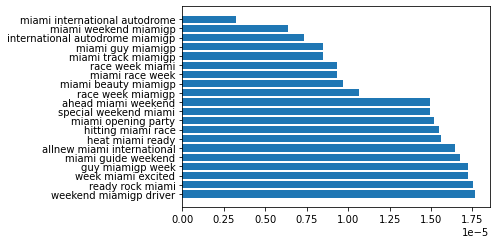

In [87]:
f1_phrases = []
score = []
for item in keywords_sort:
    print(item)
    f1_phrases.append(item[0])
    score.append(item[1])

plt.barh(f1_phrases, width=score)

plt.show()

In [88]:
f1_phrases

['weekend miamigp driver',
 'ready rock miami',
 'week miami excited',
 'guy miamigp week',
 'miami guide weekend',
 'allnew miami international',
 'heat miami ready',
 'hitting miami race',
 'miami opening party',
 'special weekend miami',
 'ahead miami weekend',
 'race week miamigp',
 'miami beauty miamigp',
 'miami race week',
 'race week miami',
 'miami track miamigp',
 'miami guy miamigp',
 'international autodrome miamigp',
 'miami weekend miamigp',
 'miami international autodrome']

In [89]:
score

[1.7652876687240923e-05,
 1.752315582783526e-05,
 1.723647037674567e-05,
 1.7204419975468976e-05,
 1.6719835583570523e-05,
 1.6441886260511323e-05,
 1.5608305630228093e-05,
 1.5489848764569187e-05,
 1.5198383041207984e-05,
 1.4966025041833326e-05,
 1.4966025041833326e-05,
 1.0662738035226531e-05,
 9.686626898299729e-06,
 9.353921173593649e-06,
 9.353921173593647e-06,
 8.482665461244785e-06,
 8.482665461244785e-06,
 7.3537679434664755e-06,
 6.395007378855243e-06,
 3.2254300489517883e-06]

In [90]:
##Converting list to dataframe
dataframe=pd.DataFrame(keywords_sort)

In [91]:
##Assigning column names to the dataframe
dataframe.columns=["Phrases","Significance Value"]

In [92]:
##Sorting in descending order of significance value
df_sorted_desc= dataframe.sort_values('Significance Value',ascending=False)

In [93]:
df_sorted_desc

,Phrases,Significance Value
0,weekend miamigp driver,0.000018
1,ready rock miami,0.000018
2,week miami excited,0.000017
3,guy miamigp week,0.000017
4,miami guide weekend,0.000017
5,allnew miami international,0.000016
6,heat miami ready,0.000016
7,hitting miami race,0.000015
8,miami opening party,0.000015
10,ahead miami weekend,0.000015


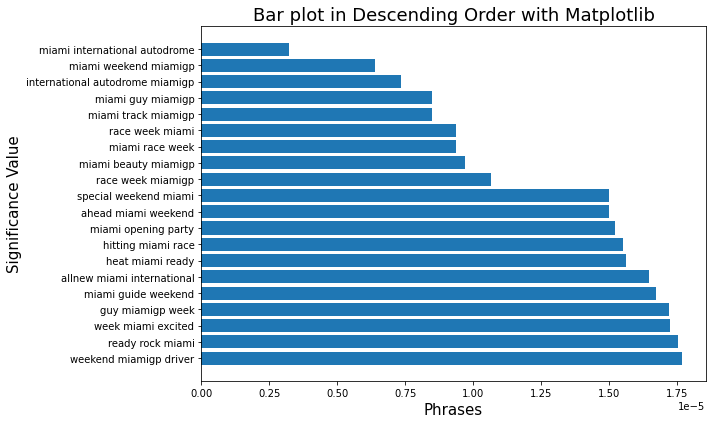

In [94]:
plt.figure(figsize=(10,6))
# bar plot with matplotlib
plt.barh('Phrases', 'Significance Value',data=df_sorted_desc)
plt.xlabel("Phrases", size=15)
plt.ylabel("Significance Value", size=15)
plt.title("Bar plot in Descending Order with Matplotlib", size=18)
plt.savefig("bar_plot_matplotlib_descending_order_Python.png")

Text(0.5, 1.0, 'Twitter Ngrams using Yake model')

<Figure size 1008x1152 with 0 Axes>

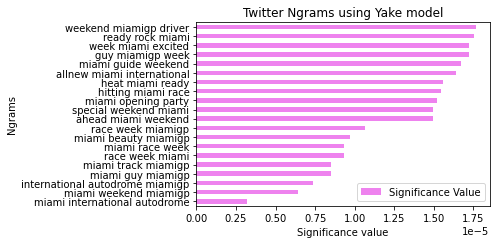

In [181]:
## Plotting ngrams using yake model
plt.figure(figsize=(14,16))
df_sorted_desc.sort_values('Significance Value',inplace=True)
df_sorted_desc.plot(kind='barh',y='Significance Value',x='Phrases',color='violet')
plt.xlabel("Significance value")
plt.ylabel("Ngrams")
plt.title("Twitter Ngrams using Yake model")